In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('Libraries imported.')

Libraries imported.


In [2]:
!pip install beautifulsoup4
!pip install lxml

In [3]:
from bs4 import BeautifulSoup
import requests

In [4]:
#!wget -O municipalities_milan.html https://en.wikipedia.org/wiki/Municipalities_of_Milan

In [5]:
with open("municipalities_milan.html") as html_file:
    soup = BeautifulSoup(html_file, 'lxml')
#print(soup.prettify())

In [6]:
match = soup.title.text
print(match)

Municipalities of Milan - Wikipedia


In [7]:
all_tables=soup.find_all("table")
#all_tables

In [8]:
right_table=soup.find('table', class_='wikitable sortable')
#right_table

In [9]:
right_table.a.get_attribute_list('title')

['Zone 1 of Milan']

In [10]:
O=[]
P=[]
Q=[]
R=[]
S=[]
T=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==6:
        O.append(cells[0].find(text=True))
        P.append(cells[1].find(text=True))
        Q.append(cells[2].find(text=True))
        R.append(cells[3].find(text=True))
        S.append(cells[4].find(text=True))
        T.append(cells[5].find(text=True))

In [11]:
F_milan=pd.DataFrame(O,columns=['Borough'])
F_milan['Name']=P
F_milan['Area (km2)']=Q
F_milan['Population(2014)']=R
F_milan['Population Density (inhabitants/km2)']=S
F_milan['Districts']=T
print("\nExtraction of first set of data, with each borough's area covered, Total population and Population density per km2\n")
F_milan


Extraction of first set of data, with each borough's area covered, Total population and Population density per km2



Borough               Name Area (km2) Population(2014)  \
0       1     Centro storico       9.67           96,315   
1       2  Stazione Centrale      12.58          153.109   
2       3        Città Studi      14.23          141,229   
3       4     Porta Vittoria      20.95          156.369   
4       5          Vigentino      29.87          123,779   
5       6             Barona      18.28          149,000   
6       7             Baggio      31.34          170,814   
7       8              Fiera      23.72          181,669   
8       9    Porta Garibaldi      21.12          181,598   

  Population Density (inhabitants/km2)   Districts  
0                               11,074       Brera  
1                               13,031     Adriano  
2                               10,785   Casoretto  
3                                8,069  Acquabella  
4                                4,487    Basmetto  
5                                8,998      Arzaga  
6                                6,093     Assiano  
7                                8,326  Boldinasco  
8                                9,204      Affori

![""](533px-Milan,_administrative_divisions_-_Nmbrs_-_colored.svg.png)

Image of Milan map and its 9 Boroughs

In [12]:
A=[]
H=[]
I=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(row.findAll('td'))==6:
        H=cells[0].find(text=True)
        for titres in row.findAll('td'):
            for link in titres.findAll('a'):
                if len(titres.findAll('a'))<=5:                
                    A.append(cells[0].find(text=True))
                    name= link.get('title')
                    I.append(name)
df1=pd.DataFrame(A,columns=['Borough'])
df1['Name']=I
df1['Name']= df1.Name.str.replace('(\(district of Milan\))', '')
df1['Name']= df1.Name.str.replace('(\(\))', '')
df1['Name']= df1.Name.str.replace('(\(page does not exist\))', '')
df1['Name']= df1.Name.str.replace('(\(district\))', '')
df1['Name']= df1.Name.str.replace('(\(Milan\))', '')
df1['Name']= df1['Name'].apply(lambda x: x.strip())
df1.head()
df1['Borough']= list(map(int, df1['Borough']))
unique_set=[]
unique_set=df1['Borough'].unique()
unique_set
df1.head()

Borough                         Name
0        1              Zone 1 of Milan
1        1               Centro storico
2        2              Zone 2 of Milan
3        2  Stazione di Milano Centrale
4        2                        Gorla

In [13]:
def convert(list): 
    return tuple(list)

df2=pd.DataFrame()

for i in range(1, len(unique_set)+1):
    liste=[]
    liste = df1[ (df1['Borough']== i)]
    pc = pd.DataFrame(liste)
    see=pc[pc['Name'].str.contains("Zone")].index
    pc.drop(see, inplace=True)
    setting=[]
    setting=pc['Name'].unique()
    pc.reset_index(inplace=True)
    pc.drop("index", inplace=True, axis=1)     
    fr=pd.Series([str(i), convert(setting)])
    df2=df2.append(fr, ignore_index=True)
df2.rename(columns={0:'Borough',1:'Name'}, inplace=True)
df2

Borough                                               Name
0       1                                  (Centro storico,)
1       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...
2       3             (Città Studi, Lambrate, Porta Venezia)
3       4                        (Porta Vittoria, Forlanini)
4       5              (Vigentino, Chiaravalle, Gratosoglio)
5       6                              (Barona, Lorenteggio)
6       7                      (Baggio, De Angeli, San Siro)
7       8        (Fiera Milano, Gallaratese, Quarto Oggiaro)
8       9                        (Porta Garibaldi, Niguarda)

In [14]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(row.findAll('td'))==6:
        G=cells[0].find(text=True)
        for titres in row.findAll('td'):
            for link in titres.findAll('a'):
                if len(titres.findAll('a'))>5:                
                    district= link.get('title')
                    
                    A.append(cells[0].find(text=True))
                    #B.append(cells[1].find(text=True))
                    C.append(cells[2].find(text=True))
                    D.append(cells[3].find(text=True))
                    E.append(cells[4].find(text=True))
                    F.append(district)
                    

In [15]:
df=pd.DataFrame(A,columns=['Borough'])
#df['Name']=B
df['Area (km2)']=C
df['Population(2014)']=D
df['Population Density (inhabitants/km2)']=E
df['Districts']=F
df.head()

Borough Area (km2) Population(2014) Population Density (inhabitants/km2)  \
0       1       9.67           96,315                               11,074   
1       1       9.67           96,315                               11,074   
2       1       9.67           96,315                               11,074   
3       1       9.67           96,315                               11,074   
4       1       9.67           96,315                               11,074   

                                           Districts  
0                          Brera (district of Milan)  
1  Centro Storico (district of Milan) (page does ...  
2                                 Conca del Naviglio  
3  Guastalla (district of Milan) (page does not e...  
4                                     Porta Sempione

In [16]:
df['Districts']= df.Districts.str.replace('(\(district of Milan\))', '')
df['Districts']= df.Districts.str.replace('(\(\))', '')
df['Districts']= df.Districts.str.replace('(\(page does not exist\))', '')
df['Districts']= df.Districts.str.replace('(\(Milan\))', '')
df['Districts']= df.Districts.str.replace('(\(district\))', '')
df['Districts']= df['Districts'].apply(lambda x: x.strip())
df.head()

Borough Area (km2) Population(2014) Population Density (inhabitants/km2)  \
0       1       9.67           96,315                               11,074   
1       1       9.67           96,315                               11,074   
2       1       9.67           96,315                               11,074   
3       1       9.67           96,315                               11,074   
4       1       9.67           96,315                               11,074   

            Districts  
0               Brera  
1      Centro Storico  
2  Conca del Naviglio  
3           Guastalla  
4      Porta Sempione

In [17]:
df.dtypes

Borough                                 object
Area (km2)                              object
Population(2014)                        object
Population Density (inhabitants/km2)    object
Districts                               object
dtype: object

In [18]:
df.drop(['Area (km2)', 'Population(2014)', 'Population Density (inhabitants/km2)'], inplace=True, axis=1)
df.head()

Borough           Districts
0       1               Brera
1       1      Centro Storico
2       1  Conca del Naviglio
3       1           Guastalla
4       1      Porta Sempione

In [19]:
df.shape

(145, 2)

In [20]:
df_milan=df2.merge(df, on='Borough')
df_milan['Districts']= df_milan.Districts.str.replace('Vercellese', 'Vercelli')
df_milan['Districts']= df_milan.Districts.str.replace('Stazione di Milano Centrale', 'Stazione Centrale')
df_milan['Districts']= df_milan.Districts.str.replace('Fatima', 'Quartiere Fatima')
df_milan['Districts']= df_milan.Districts.str.replace('San Gottardo', 'Corso San Gottardo')
df_milan['Districts']= df_milan.Districts.str.replace('Teramo', 'Teramo Barona')
df_milan['Districts']= df_milan.Districts.str.replace('Harar', 'Harar San Siro')
drop_portanuova = df_milan[df_milan["Districts"]== "Porta Nuova"].index
df_milan.drop(drop_portanuova, inplace=True)
df_milan.reset_index(inplace=True)
df_milan.drop("index", inplace=True, axis=1)
df_milan.head()

Borough               Name           Districts
0       1  (Centro storico,)               Brera
1       1  (Centro storico,)      Centro Storico
2       1  (Centro storico,)  Conca del Naviglio
3       1  (Centro storico,)           Guastalla
4       1  (Centro storico,)      Porta Sempione

In [21]:
districts_per_borough = df_milan.groupby('Borough').count().reset_index()
districts_per_borough.drop('Name', inplace=True, axis=1)
districts_per_borough["Borough"]= list(map(int, districts_per_borough["Borough"]))
districts_per_borough

Borough  Districts
0        1          6
1        2         13
2        3         10
3        4         19
4        5         22
5        6         18
6        7         15
7        8         23
8        9         17

In [22]:
districts_per_borough.dtypes

Borough      int64
Districts    int64
dtype: object

In [23]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


Text(0.5, 0, 'Borough')

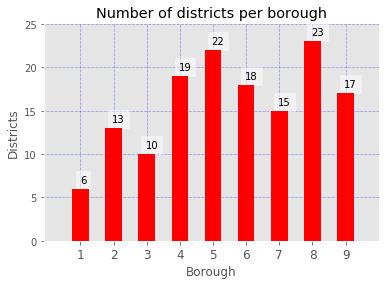

In [24]:
ax = plt.subplot(111)
ax.set_xlim(-0.1, 10)
ax.grid(b=True, which='major', color='blue', linestyle=':', lw=.5, zorder=1)
# x,y data
x =np.array(districts_per_borough["Borough"])
y = np.array(districts_per_borough["Districts"])
# Define upper y limit leaving space for the text above the bars.
up = max(y) * .03
ax.set_ylim(0, max(y) + 3 * up)
ax.bar(x, y, align='center', width=0.5, color='red', zorder=4)
# Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax.text(xi - len(l) * .02, yi + up, l,
            bbox=dict(facecolor='w', edgecolor='w', alpha=.5))
ax.set_xticks(x)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9'])
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_title('Number of districts per borough')
ax.set_ylabel('Districts')
ax.set_xlabel('Borough')

In [25]:
#!wget -O Geospatial_data.csv https://cocl.us/Geospatial_data

In [26]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

import json

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [27]:
address = 'Milan, Italy'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Milan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Milan are 45.4668, 9.1905.


In [28]:
CLIENT_ID = 'W3C5SHO5BTWD4P2LH1OIAOIQI450LITWR0PYLNP3MOEYGTTD' # my Foursquare ID
CLIENT_SECRET = '0Q5BV1A4JR1T5IG1YP0XTBQYBB23KPLVKDCSLPXN1IW25WVM' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: W3C5SHO5BTWD4P2LH1OIAOIQI450LITWR0PYLNP3MOEYGTTD
CLIENT_SECRET:0Q5BV1A4JR1T5IG1YP0XTBQYBB23KPLVKDCSLPXN1IW25WVM


In [29]:
limit = 145
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=W3C5SHO5BTWD4P2LH1OIAOIQI450LITWR0PYLNP3MOEYGTTD&client_secret=0Q5BV1A4JR1T5IG1YP0XTBQYBB23KPLVKDCSLPXN1IW25WVM&ll=45.4668,9.1905&v=20180605&radius=500&limit=145'

In [30]:
column_names = ['Latitude', 'Longitude'] 

coordinates = pd.DataFrame(columns = column_names)

print("Retrieving coordinates...")

for value in range(len(df_milan["Districts"])):
    try:
        address = df_milan.iloc[value, 2] + ', Milan'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        lat = location.latitude
        long = location.longitude
        coordinates = coordinates.append({'Latitude': lat,'Longitude': long}, ignore_index=True)
    except AttributeError:
        print ("Cannot get coordinates of ", address, '\n')
        print(value)
        lat = None
        Long = None
        coordinates = coordinates.append({'Latitude': lat,'Longitude': long}, ignore_index=True)

df_milan["Latitude" ] = coordinates["Latitude"]
df_milan["Longitude"] = coordinates["Longitude"]

df_milan.head(10)


Retrieving coordinates...


Borough                                               Name  \
0       1                                  (Centro storico,)   
1       1                                  (Centro storico,)   
2       1                                  (Centro storico,)   
3       1                                  (Centro storico,)   
4       1                                  (Centro storico,)   
5       1                                  (Centro storico,)   
6       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
7       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
8       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
9       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   

            Districts   Latitude  Longitude  
0               Brera  45.471519   9.187735  
1      Centro Storico  45.444613   9.096351  
2  Conca del Naviglio  45.458560   9.177745  
3           Guastalla  45.458252   9.200023  
4      Porta Sempione  45.477128   9.170598  
5      Porta Tenaglia  45.477821   9.181593  
6             Adriano  45.513572   9.251202  
7         Crescenzago  45.509219   9.247484  
8               Gorla  45.504945   9.224539  
9               Greco  45.502184   9.211233

In [31]:
mandello = df_milan[df_milan["Districts"]== "Mandello"].index
df_milan = df_milan.dropna(how='any',axis=0)
df_milan.drop(mandello, inplace=True)
df_milan.reset_index(inplace=True)
df_milan.drop("index", inplace=True, axis=1)
df_milan.head(10)

Borough                                               Name  \
0       1                                  (Centro storico,)   
1       1                                  (Centro storico,)   
2       1                                  (Centro storico,)   
3       1                                  (Centro storico,)   
4       1                                  (Centro storico,)   
5       1                                  (Centro storico,)   
6       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
7       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
8       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
9       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   

            Districts   Latitude  Longitude  
0               Brera  45.471519   9.187735  
1      Centro Storico  45.444613   9.096351  
2  Conca del Naviglio  45.458560   9.177745  
3           Guastalla  45.458252   9.200023  
4      Porta Sempione  45.477128   9.170598  
5      Porta Tenaglia  45.477821   9.181593  
6             Adriano  45.513572   9.251202  
7         Crescenzago  45.509219   9.247484  
8               Gorla  45.504945   9.224539  
9               Greco  45.502184   9.211233

In [32]:
df_milan.shape

(142, 5)

In [33]:
F_milan["Borough"]= list(map(float, F_milan["Borough"]))
F_milan["Area (km2)"]= list(map(float, F_milan["Area (km2)"]))
F_milan.dtypes

Borough                                 float64
Name                                     object
Area (km2)                              float64
Population(2014)                         object
Population Density (inhabitants/km2)     object
Districts                                object
dtype: object

In [34]:
# importing required modules 
#from zipfile import ZipFile 
  
# specifying the zip file name 
#file_name = "Municipi_RDN2008.zip"
  
# opening the zip file in READ mode 
#with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#    zip.printdir() 
  
    # extracting all the files 
#    print('Extracting all the files now...') 
#    zip.extractall() 
#    print('Done!')


In [35]:
municipi = r'Municipi.shp'
municipi

'Municipi.shp'

In [36]:
import shapefile
sf = shapefile.Reader("Municipi.shp")
print(sf)

shapefile Reader
    9 shapes (type 'POLYGON')
    9 records (4 fields)


In [37]:
#!conda install gdal
# read the shapefile
reader = shapefile.Reader("Municipi.shp")
fields = reader.fields[1:]
field_names = [field[0] for field in fields]
buffer = []
for sr in reader.shapeRecords():
    atr = dict(zip(field_names, sr.record))
    geom = sr.shape.__geo_interface__
    buffer.append(dict(type="Feature", \
    geometry=geom, properties=atr)) 
   
# write the geojson file
from json import dumps
geojson = open("Municipio.geojson", "w")
geojson.write(dumps({"type": "FeatureCollection",\
"features": buffer}, indent=2) + "\n")
municipi_json = r'Municipio.json'
municipi_geojson = r'Municipio.geojson'
municipi_json
#geojson.close()

'Municipio.json'

In [38]:
!pip install geojson

In [39]:
# create map of Milan using latitude and longitude values
from IPython.core.display import HTML
import random
import geojson

def random_html_color():
    r = random.randint(0,256)
    g = random.randint(0,256)
    b = random.randint(0,256)
    return '#%02x%02x%02x' % (r, g, b)

# Providing filename that shall be embedded.
#GeoJson('Municipio.json')
# Providing filename that shall not be embedded.
#GeoJson('Municipio.json', embed=False)
# Providing dict.
#GeoJson(json.load(open('Municipio.json')))
# Providing string.
#GeoJson(open('Municipio.json').read())

#ice_map.geo_json(geo_path=geo_path)

def style_fcn(x):
    return { 'fillColor': random_html_color() }
style_function= lambda x: {'fillColor':'#00ff00'}

#geojson(open('Municipio.json').read())

milan = folium.Map(location=[latitude, longitude], tiles='Stamen Toner', zoom_start=11)
folium.map.Layer()
folium.GeoJson(municipi_json, style_function=style_function).add_to(milan) #, style_function=style_fcn

#add chloropleth layer
milan.choropleth(
    geo_data=municipi_geojson,
    name='Borough Divisions per Population',
    data=F_milan,
    columns=['Borough', 'Area (km2)'],
    fill_color='YlGn',
    key_on='feature.properties.PERIMETRO',
    legend_name='Borough Divisions per Population'
)
milan
#HTML(milan._repr_html_())

In [40]:
# create map of Milan using latitude and longitude values
from IPython.core.display import HTML

map_milan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_milan['Latitude'], df_milan['Longitude'], df_milan['Districts']+', Borough '+df_milan['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        #try simplemarker, polygon_marker
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_milan) 
    
HTML(map_milan._repr_html_())
map_milan.save('milan_and_districts_map.html')
map_milan


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Districts', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
LIMIT = 145
milan_venues = getNearbyVenues(names=df_milan['Districts'],
                                   latitudes=df_milan['Latitude'],
                                   longitudes=df_milan['Longitude']
                                  )

In [43]:
print("There are :", milan_venues.shape[0], "venues retrieved\n\n")
milan_venues.head()

There are : 3629 venues retrieved




Districts  District Latitude  District Longitude                   Venue  \
0     Brera          45.471519            9.187735    BVLGARI Hotel Milano   
1     Brera          45.471519            9.187735      Bulgari Lounge Bar   
2     Brera          45.471519            9.187735  Di Viole Di Liquirizia   
3     Brera          45.471519            9.187735     Pinacoteca di Brera   
4     Brera          45.471519            9.187735        Palazzo di Brera   

   Venue Latitude  Venue Longitude         Venue Category  
0       45.470621         9.189779                  Hotel  
1       45.470014         9.188943           Cocktail Bar  
2       45.471460         9.185336           Cupcake Shop  
3       45.471979         9.188128             Art Museum  
4       45.472019         9.188043  College Arts Building

In [44]:
milan_venues.groupby('Venue Category').count().sort_values(by="Districts", ascending=False)


Districts  District Latitude  \
Venue Category                                                           
Italian Restaurant                              405                405   
Café                                            255                255   
Pizza Place                                     255                255   
Hotel                                           133                133   
Ice Cream Shop                                  120                120   
Restaurant                                      105                105   
Tram Station                                     94                 94   
Japanese Restaurant                              87                 87   
Plaza                                            81                 81   
Cocktail Bar                                     79                 79   
Chinese Restaurant                               62                 62   
Supermarket                                      59                 59   
Pub                                              57                 57   
Seafood Restaurant                               55                 55   
Bistro                                           54                 54   
Bakery                                           53                 53   
Sushi Restaurant                                 51                 51   
Park                                             42                 42   
Bar                                              39                 39   
Wine Bar                                         38                 38   
Sandwich Place                                   36                 36   
Dessert Shop                                     33                 33   
Burger Joint                                     32                 32   
Bus Stop                                         31                 31   
Bookstore                                        31                 31   
Theater                                          31                 31   
Coffee Shop                                      29                 29   
Gym / Fitness Center                             29                 29   
Gym                                              29                 29   
Clothing Store                                   23                 23   
Kebab Restaurant                                 23                 23   
Asian Restaurant                                 22                 22   
Trattoria/Osteria                                22                 22   
Soccer Field                                     21                 21   
Art Gallery                                      20                 20   
Fast Food Restaurant                             19                 19   
Vegetarian / Vegan Restaurant                    17                 17   
Piadineria                                       17                 17   
Diner                                            16                 16   
Convenience Store                                16                 16   
Brewery                                          16                 16   
Nightclub                                        16                 16   
Ramen Restaurant                                 15                 15   
Gastropub                                        15                 15   
Steakhouse                                       15                 15   
Sporting Goods Shop                              15                 15   
Indian Restaurant                                15                 15   
Boutique                                         15                 15   
Bed & Breakfast                                  14                 14   
Lounge                                           14                 14   
Pastry Shop                                      14                 14   
Breakfast Spot                                   14                 14   
Fried Chicken Joint                           

We see that the most popular venue categories are Italian Restaurants, Cafés, Pizza Places, 
Hotels and Ice Cream Shops, etc, so it seems good to choose clusters that have 
most of these categories in them

In [45]:
milan_venues.groupby('Districts').count()
groupby_milan = milan_venues.groupby('Districts').count().reset_index()
groupby_milan.head(5)

Districts  District Latitude  District Longitude  Venue  Venue Latitude  \
0  Acquabella                 34                  34     34              34   
1     Adriano                  6                   6      6               6   
2      Affori                 15                  15     15              15   
3      Arzaga                 12                  12     12              12   
4     Assiano                  2                   2      2               2   

   Venue Longitude  Venue Category  
0               34              34  
1                6               6  
2               15              15  
3               12              12  
4                2               2

In [46]:
merge_milan = pd.merge(df, groupby_milan, how='inner', on='Districts', sort=False)
merge_milan.head()


Borough           Districts  District Latitude  District Longitude  Venue  \
0       1               Brera                 90                  90     90   
1       1      Centro Storico                 11                  11     11   
2       1  Conca del Naviglio                100                 100    100   
3       1           Guastalla                 55                  55     55   
4       1      Porta Sempione                 78                  78     78   

   Venue Latitude  Venue Longitude  Venue Category  
0              90               90              90  
1              11               11              11  
2             100              100             100  
3              55               55              55  
4              78               78              78

In [47]:
i=1
count_venues = pd.DataFrame()
while i<=9:
    liste=[]
    liste = merge_milan[ (merge_milan['Borough']== str(i))].values
    pc = pd.DataFrame(liste) # , columns=['Borough','Districts', 'District Latitude', 'District Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'])
    see=pc.sum(axis=0)
     
    fr=pd.Series([str(i), see[2]])
    i=i+1
    count_venues=count_venues.append(fr, ignore_index=True)
    #print(see[2])
count_venues.rename(columns={0: "Borough", 1:"Popular Venues"}, inplace=True) 
count_venues["Popular Venues"] = list(map(int, count_venues["Popular Venues"]))
count_venues.sort_values(by="Borough", ascending=True, inplace=True)
count_venues   

Borough  Popular Venues
0       1             434
1       2             301
2       3             330
3       4             378
4       5             232
5       6             485
6       7             190
7       8             493
8       9             569

In [48]:
count_venues["Borough"] = list(map(int, count_venues["Borough"]))
count_venues.dtypes

Borough           int64
Popular Venues    int64
dtype: object

Text(0.5, 0, 'Borough')

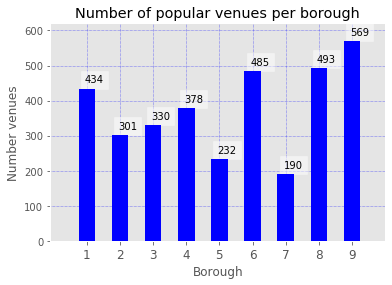

In [49]:
ax = plt.subplot(111)
ax.set_xlim(-0.1, 10)
ax.grid(b=True, which='major', color='blue', linestyle=':', lw=.5, zorder=1)
# x,y data
x =np.array(count_venues["Borough"])
y = np.array(count_venues["Popular Venues"])
# Define upper y limit leaving space for the text above the bars.
up = max(y) * .03
ax.set_ylim(0, max(y) + 3 * up)
ax.bar(x, y, align='center', width=0.5, color='blue', zorder=4)
# Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax.text(xi - len(l) * .02, yi + up, l,
            bbox=dict(facecolor='w', edgecolor='w', alpha=.5))
ax.set_xticks(x)
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9'])
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_title('Number of popular venues per borough')
ax.set_ylabel('Number venues')
ax.set_xlabel('Borough')

In [53]:
world_milan = r'ds634_civici_coordinategeografiche_20200501.geojson'
world_milan

'ds634_civici_coordinategeografiche_20200501.geojson'

After checking this out, I realize Boroughs 5 and 7 are not popular boroughs. So, I will scrape them off our data

In [55]:
tabs = merge_milan[ (merge_milan['Borough']== '5') ].index
tab1 = merge_milan[ (merge_milan['Borough']== '7') ].index
merge_milan.drop(tabs, inplace=True)
merge_milan.drop(tab1, inplace=True)
merge_milan.reset_index(inplace=True)
merge_milan.drop("index", inplace=True, axis=1)
merge_milan.reset_index()
merge_milan.head()


Borough           Districts  District Latitude  District Longitude  Venue  \
0       1               Brera                 90                  90     90   
1       1      Centro Storico                 11                  11     11   
2       1  Conca del Naviglio                100                 100    100   
3       1           Guastalla                 55                  55     55   
4       1      Porta Sempione                 78                  78     78   

   Venue Latitude  Venue Longitude  Venue Category  
0              90               90              90  
1              11               11              11  
2             100              100             100  
3              55               55              55  
4              78               78              78

In [56]:
merge_milan.drop(["District Latitude", "District Longitude", "Venue", "Venue Latitude","Venue Longitude", "Venue Category"], inplace=True, axis=1)
merge_milan.head()

Borough           Districts
0       1               Brera
1       1      Centro Storico
2       1  Conca del Naviglio
3       1           Guastalla
4       1      Porta Sempione

In [57]:
merge_milan.shape

(102, 2)

In [58]:
#milan_venues = pd.join(milan_venues, merge_milan)
milan_venues = milan_venues.join(merge_milan.set_index('Districts'), on='Districts')

milan_venues = milan_venues.dropna(how='any',axis=0)
#milan_venues.dropna(axis=0, how='any', inplace=True)
milan_venues.head(20)

Districts  District Latitude  District Longitude                   Venue  \
0      Brera          45.471519            9.187735    BVLGARI Hotel Milano   
1      Brera          45.471519            9.187735      Bulgari Lounge Bar   
2      Brera          45.471519            9.187735  Di Viole Di Liquirizia   
3      Brera          45.471519            9.187735     Pinacoteca di Brera   
4      Brera          45.471519            9.187735        Palazzo di Brera   
5      Brera          45.471519            9.187735              Rigadritto   
6      Brera          45.471519            9.187735             Il Giardino   
7      Brera          45.471519            9.187735                 SUSHI B   
8      Brera          45.471519            9.187735      Bvlgari Ristorante   
9      Brera          45.471519            9.187735      Piazza del Carmine   
10     Brera          45.471519            9.187735               Kusmi Tea   
11     Brera          45.471519            9.187735  HMS Hotel Milano Scala   
12     Brera          45.471519            9.187735            Il patuscino   
13     Brera          45.471519            9.187735          Palazzo Parigi   
14     Brera          45.471519            9.187735       Mandarin Oriental   
15     Brera          45.471519            9.187735                    Clan   
16     Brera          45.471519            9.187735         Gelateria Toldo   
17     Brera          45.471519            9.187735     Six Inch Hair & Spa   
18     Brera          45.471519            9.187735               Convivium   
19     Brera          45.471519            9.187735                RivaReno   

    Venue Latitude  Venue Longitude         Venue Category Borough  
0        45.470621         9.189779                  Hotel       1  
1        45.470014         9.188943           Cocktail Bar       1  
2        45.471460         9.185336           Cupcake Shop       1  
3        45.471979         9.188128             Art Museum       1  
4        45.472019         9.188043  College Arts Building       1  
5        45.469721         9.188008              Gift Shop       1  
6        45.469989         9.188872                 Lounge       1  
7        45.472153         9.186883    Japanese Restaurant       1  
8        45.470005         9.188943             Restaurant       1  
9        45.470102         9.185058                  Plaza       1  
10       45.472053         9.185824               Tea Room       1  
11       45.469061         9.186865                  Hotel       1  
12       45.471348         9.185275            Karaoke Bar       1  
13       45.473378         9.191108                  Hotel       1  
14       45.469461         9.190876                  Hotel       1  
15       45.472452         9.185426            Men's Store       1  
16       45.469589         9.185102         Ice Cream Shop       1  
17       45.470829         9.185033     Salon / Barbershop       1  
18       45.470390         9.184670     Italian Restaurant       1  
19       45.471112         9.184150         Ice Cream Shop       1

In [59]:
print('There are {} uniques categories.'.format(len(milan_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [60]:
#milan_venues.groupby(["Venue Category", "Borough"]).count()

In [61]:
print("There are :", milan_venues.shape[0], "venues retrieved\n\n")

There are : 2990 venues retrieved




In [62]:
map_milan_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

 add markers to map
for lat, lng, label in zip(milan_venues['Venue Latitude'], milan_venues['Venue Longitude'], milan_venues['Venue']+', Borough '+milan_venues['Borough']):
    milan_merged.loc[milan_merged['Cluster Labels'] == 4, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        #try simplemarker, polygon_marker
        [lat, lng],
        # radius=2,
        popup=label
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map_milan_venues) 

 HTML(map_milan_venues._repr_html_())
map_milan_venues.save('milan_and_venues_map.html')
map_milan_venues

In [63]:
# one hot encoding
milan_onehot = pd.get_dummies(milan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
milan_onehot['Districts'] = milan_venues['Districts'] 

# move neighborhood column to the first column
fixed_columns = [milan_onehot.columns[-1]] + list(milan_onehot.columns[:-1])
milan_onehot = milan_onehot[fixed_columns]

milan_onehot.head()

Districts  Accessories Store  Adult Education Center  African Restaurant  \
0     Brera                  0                       0                   0   
1     Brera                  0                       0                   0   
2     Brera                  0                       0                   0   
3     Brera                  0                       0                   0   
4     Brera                  0                       0                   0   

   Airport Service  Alternative Healer  American Restaurant  Aquarium  Arcade  \
0                0                   0                    0         0       0   
1                0                   0                    0         0       0   
2                0                   0                    0         0       0   
3                0                   0                    0         0       0   
4                0                   0                    0         0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           1                    0   
4                       0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Australian Restaurant  Auto Garage  \
0                 0                   0                      0            0   
1                 0                   0                      0            0   
2                 0                   0                      0            0   
3                 0                   0                      0            0   
4                 0                   0                      0            0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Ballroom  Bar  \
0                0          0           0       0         0    0   
1                0          0           0       0         0    0   
2                0          0           0       0         0    0   
3                0          0           0       0         0    0   
4                0          0           0       0         0    0   

   Basketball Court  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0                 0                0         0            0           0   
1                 0                0         0            0           0   
2                 0                0         0            0           0   
3                 0                0         0            0           0   
4                 0                0         0            0           0   

   Belgian Restaurant  Bike Shop  Bistro  Board Shop  Bookstore  Boutique  \
0                   0          0       0           0          0         0   
1                   0          0       0           0          0         0   
2                   0          0       0           0          0         0   
3                   0          0       0           0          0         0   
4                   0          0       0           0          0         0   

   Bowling Alley  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0              0                     0               0        0            0   
1              0                     0               0        0            0   
2              0                     0               0        0            0   
3              0                     0               0        0            0   
4              0                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Station  \
0                0         0             0              0            0   
1                0         0             0              0            0   
2                0         0             0              0            0   
3                0  

In [64]:
milan_onehot.shape

(2990, 272)

In [65]:
milan_grouped = milan_onehot.groupby('Districts').mean().reset_index()
milan_grouped

Districts  Accessories Store  Adult Education Center  \
0                      Acquabella           0.000000                  0.0000   
1                         Adriano           0.000000                  0.0000   
2                          Affori           0.000000                  0.0000   
3                          Arzaga           0.000000                  0.0000   
4                          Barona           0.000000                  0.0000   
5                         Bicocca           0.000000                  0.0000   
6                       Boffalora           0.000000                  0.0000   
7                      Boldinasco           0.000000                  0.0000   
8                          Bovisa           0.000000                  0.0000   
9                       Bovisasca           0.000000                  0.0000   
10                          Brera           0.011111                  0.0000   
11                       Bruzzano           0.000000                  0.0000   
12                        Bullona           0.000000                  0.0000   
13                     Ca' Granda           0.000000                  0.0000   
14                        Cagnola           0.000000                  0.0000   
15                     Calvairate           0.000000                  0.0000   
16                Campo dei Fiori           0.000000                  0.0000   
17                 Cascina Bianca           0.000000                  0.0000   
18                Cascina Triulza           0.000000                  0.0000   
19                      Casoretto           0.000000                  0.0000   
20                     Castagnedo           0.000000                  0.0000   
21                       Cavriano           0.000000                  0.0000   
22   Centro Direzionale di Milano           0.000000                  0.0000   
23                 Centro Storico           0.000000                  0.0000   
24               Chinatown, Milan           0.013699                  0.0000   
25                        Cimiano           0.000000                  0.0000   
26                    Città Studi           0.000000                  0.0000   
27                       Comasina           0.000000                  0.0000   
28                         Comina           0.000000                  0.0000   
29             Conca del Naviglio           0.000000                  0.0000   
30                      Conchetta           0.000000                  0.0000   
31                    Crescenzago           0.000000                  0.0000   
32                          Creta           0.000000                  0.0000   
33                        Dergano           0.000000                  0.0000   
34                          Fiera           0.000000                  0.0000   
35                       Foppette           0.000000                  0.0000   
36                      Forlanini           0.000000                  0.0000   
37                   Fulvio Testi           0.000000                  0.0000   
38                    Gallaratese           0.000000                  0.0625   
39                     Gamboloita           0.000000                  0.0000   
40                      Garegnano           0.000000                  0.0000   
41                       Ghisolfa           0.000000                  0.0000   
42        Giambellino-Lorenteggio           0.000000                  0.0000   
43                          Gorla           0.000000                  0.0000   
44                          Greco           0.000000                  0.0000   
45                      Guastalla           0.000000                  0.0000   
46                          Isola           0.000000                  0.0000   
47                     La Fontana           0.000000                  0.0000   
48                      La Trecca           0.000000                  0.0000   
49                      

In [66]:
milan_grouped.shape

(102, 272)

In [107]:
num_top_venues = 5

for hood in milan_grouped['Districts']:
    #print("----"+hood+"----")
    temp = milan_grouped[milan_grouped['Districts'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [108]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [109]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['Districts'] = milan_grouped['Districts']

for ind in np.arange(milan_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(milan_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

Districts 1st Most Common Venue 2nd Most Common Venue  \
0  Acquabella                 Hotel    Italian Restaurant   
1     Adriano    Italian Restaurant        Ice Cream Shop   
2      Affori    Italian Restaurant                  Café   
3      Arzaga           Pizza Place   Japanese Restaurant   
4      Barona               Theater                  Café   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place                 Plaza                  Café   
1     Trattoria/Osteria      Toy / Game Store            Food Stand   
2           Pizza Place     Health Food Store                   Gym   
3                 Hotel                 Diner    Athletics & Sports   
4     Trattoria/Osteria    Athletics & Sports          Soccer Field   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0        Ice Cream Shop          Cocktail Bar   Japanese Restaurant   
1            Food Truck            Food Court     Food & Drink Shop   
2   Fried Chicken Joint                  Park             Pool Hall   
3            Hobby Shop                   Pub          Cupcake Shop   
4   Arts & Crafts Store           Yoga Studio   Filipino Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0          Tram Station                   Park  
1                  Food      Emilia Restaurant  
2                  Pool           Cocktail Bar  
3        Ice Cream Shop         Cosmetics Shop  
4                  Farm   Fast Food Restaurant

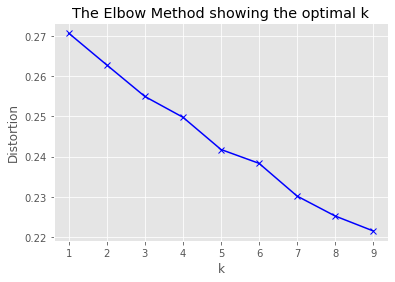

In [110]:
# clustering dataset
# determine k using elbow method

milan_grouped_clustering = milan_grouped.drop('Districts', 1)

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
#import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(milan_grouped_clustering)
    kmeanModel.fit(milan_grouped_clustering)
    distortions.append(sum(np.min(cdist(milan_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / milan_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [111]:
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(milan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 2, 4, 1, 1, 1, 1, 4], dtype=int32)

In [112]:
head.head()
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

milan_merged = df_milan

# merge milan_grouped with df_milan to add latitude/longitude for each neighborhood
milan_merged = milan_merged.join(district_venues_sorted.set_index('Districts'), on='Districts')

milan_merged = milan_merged.dropna(how='any',axis=0)

milan_merged.head()
#milan_merged.tail()

Borough               Name           Districts   Latitude  Longitude  \
0       1  (Centro storico,)               Brera  45.471519   9.187735   
1       1  (Centro storico,)      Centro Storico  45.444613   9.096351   
2       1  (Centro storico,)  Conca del Naviglio  45.458560   9.177745   
3       1  (Centro storico,)           Guastalla  45.458252   9.200023   
4       1  (Centro storico,)      Porta Sempione  45.477128   9.170598   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0             1.0    Italian Restaurant                 Hotel   
1             1.0    Italian Restaurant                  Café   
2             1.0    Italian Restaurant                  Café   
3             1.0    Italian Restaurant           Pizza Place   
4             1.0    Italian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop   Japanese Restaurant                  Café   
1           Pizza Place      Sushi Restaurant             Gift Shop   
2        Ice Cream Shop                   Pub           Pizza Place   
3        Ice Cream Shop          Tram Station            Restaurant   
4          Cocktail Bar   Japanese Restaurant        Ice Cream Shop   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0            Restaurant                     Plaza            Art Museum   
1          Cupcake Shop                      Park         Movie Theater   
2                Bistro        Seafood Restaurant            Restaurant   
3                   Bar                    Bakery      Kebab Restaurant   
4                Bakery  Mediterranean Restaurant      Sushi Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place                Theater  
1           Flea Market   Fast Food Restaurant  
2          Cocktail Bar               Boutique  
3   Japanese Restaurant               Wine Bar  
4                  Café              Gastropub

In [114]:
head.head()
milan_merged['Cluster Labels'] = list(map(int, milan_merged['Cluster Labels']))


#milan_merged.replace(to_replace={"Cluster Labels": {0: 4, 1: 5, 2: 3, 3: 2, 4: 0, 5: 1}}, inplace=True)


milan_merged['Cluster Labels'].values

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5,
       5, 5, 0, 3, 5, 5, 0, 5, 1, 3, 0, 5, 3, 4, 4, 5, 5, 5, 0, 5, 0, 3,
       0, 3, 0, 5, 5, 5, 0, 5, 0, 5, 2, 5, 0, 0, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 0, 0, 0, 0, 0, 5, 3, 5, 0, 3, 5, 5, 0, 3, 5, 0, 0, 5, 5, 5,
       0, 5, 0, 5, 0, 3, 0, 5, 0, 3, 3, 5, 3, 3])

In [115]:
milan_merged['Cluster Labels'].value_counts()

5    57
0    27
3    14
4     2
2     1
1     1
Name: Cluster Labels, dtype: int64

In [116]:
milan_venues.shape

(2990, 8)

In [117]:
milan_merged["Borough"] = list(map(str, milan_merged["Borough"] ))
milan_venues["Borough"] = list(map(str, milan_venues["Borough"] ))
milan_merged.shape

(102, 16)

In [118]:
cluster_venues = pd.DataFrame(milan_venues[["Districts", "Venue Category", "Borough"]])
mil = pd.DataFrame(milan_merged[["Districts", "Cluster Labels"]])
cluster_venues = cluster_venues.merge(mil.set_index('Districts'), on='Districts')

cluster_venues= cluster_venues.dropna(how='any',axis=0)

cluster_venues.head(15)

Districts         Venue Category Borough  Cluster Labels
0      Brera                  Hotel       1               5
1      Brera           Cocktail Bar       1               5
2      Brera           Cupcake Shop       1               5
3      Brera             Art Museum       1               5
4      Brera  College Arts Building       1               5
5      Brera              Gift Shop       1               5
6      Brera                 Lounge       1               5
7      Brera    Japanese Restaurant       1               5
8      Brera             Restaurant       1               5
9      Brera                  Plaza       1               5
10     Brera               Tea Room       1               5
11     Brera                  Hotel       1               5
12     Brera            Karaoke Bar       1               5
13     Brera                  Hotel       1               5
14     Brera                  Hotel       1               5

In [122]:
tab=cluster_venues.groupby(["Cluster Labels", "Venue Category"]).count().sort_values(by="Districts", ascending=False)
tab.head()

Districts  Borough
Cluster Labels Venue Category                        
5              Italian Restaurant        304      304
               Café                      169      169
               Pizza Place               139      139
               Hotel                      82       82
               Ice Cream Shop             78       78

In [221]:
tab_clus =cluster_venues.groupby(["Borough", "Venue Category"]).count().sort_values(by="Districts", ascending=False)
tab_clus.reset_index(inplace=True)
fullstring = tab_clus[tab_clus["Venue Category"].str.contains("Store|Shop")]
fullstring.set_index("Venue Category", inplace=True)
fullstring.rename(columns={"Districts": "Number Venues"}, inplace=True)
fullstring.drop("Cluster Labels", inplace=True, axis=1)
fullstring.reset_index(inplace=True)
fullstring.head(25)
 


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Venue Category Borough  Number Venues
0           Ice Cream Shop       1             24
1           Ice Cream Shop       6             23
2           Ice Cream Shop       9             12
3           Ice Cream Shop       2             12
4           Ice Cream Shop       3             11
5           Ice Cream Shop       4             10
6              Coffee Shop       9             10
7             Dessert Shop       3              8
8             Dessert Shop       1              7
9             Dessert Shop       4              7
10          Ice Cream Shop       8              7
11          Clothing Store       8              7
12               Pet Store       8              6
13  Furniture / Home Store       9              5
14            Dessert Shop       6              5
15               Gift Shop       1              5
16     Sporting Goods Shop       1              5
17            Cupcake Shop       6              4
18             Coffee Shop       8              4
19               Wine Shop       8              4
20          Clothing Store       1              4
21             Coffee Shop       2              3
22           Shopping Mall       8              3
23       Convenience Store       2              3
24            Dessert Shop       2              3

In [126]:
cluster_groups = cluster_venues.groupby("Cluster Labels").count().reset_index()
cluster_groups
# Actually what we see as venue category is actually the venues, so I have to change the name

Cluster Labels  Districts  Venue Category  Borough
0               0        497             497      497
1               1          2               2        2
2               2          1               1        1
3               3        212             212      212
4               4         14              14       14
5               5       2264            2264     2264

In [127]:
print(cluster_groups[cluster_groups["Districts"]== cluster_groups["Districts"].min()].index)

Int64Index([2], dtype='int64')


Text(0.5, 0, 'Cluster')

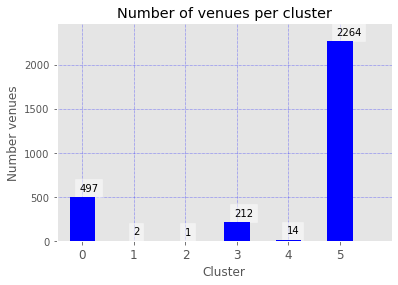

In [128]:
ax = plt.subplot(111)
ax.set_xlim(-0.5, 6)
ax.grid(b=True, which='major', color='blue', linestyle=':', lw=.5, zorder=1)
# x,y data
x =np.array(cluster_groups["Cluster Labels"])
y = np.array(cluster_groups["Venue Category"])
# Define upper y limit leaving space for the text above the bars.
up = max(y) * .03
ax.set_ylim(0, max(y) + 3 * up)
ax.bar(x, y, align='center', width=0.5, color='blue', zorder=4)
# Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax.text(xi - len(l) * .02, yi + up, l,
            bbox=dict(facecolor='w', edgecolor='w', alpha=.5))
ax.set_xticks(x)
ax.set_xticklabels(['0','1','2','3','4','5'])
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_title('Number of venues per cluster')
ax.set_ylabel('Number venues')
ax.set_xlabel('Cluster')

In [129]:
# taking away the least popular boroughs
i=1
long=3
#min_clusters= []
ve = pd.DataFrame(cluster_groups[["Cluster Labels", "Venue Category"]])
for i in range(long):
    vo = []
    vo = ve[ve["Venue Category"]== ve["Venue Category"].min()].index
    ve.drop(vo, inplace=True)
    i=i+1
    ve.reset_index(drop=True)
    #min_clusters = np.insert(vo)
clusters = np.asanyarray(ve["Cluster Labels"])
ve
print(clusters)

[0 3 5]


In [130]:
milan_merged['Cluster Labels'].value_counts()

5    57
0    27
3    14
4     2
2     1
1     1
Name: Cluster Labels, dtype: int64

In [131]:
cluster_district = cluster_venues.groupby(["Districts", "Cluster Labels"]).count().sort_values(by='Venue Category', ascending=False)
cluster_district.head(10)
#OR

cluster_district = cluster_venues.groupby(["Districts", "Cluster Labels"]).count()
cluster_district
# This shows the clusters to which each district belongs to, the columns here are Venue and not Venue Category
# I have to drop the column Borough to avoid confusion

Venue Category  Borough
Districts                    Cluster Labels                         
Acquabella                   5                           34       34
Adriano                      5                            6        6
Affori                       5                           15       15
Arzaga                       3                           12       12
Barona                       0                            6        6
Bicocca                      5                           35       35
Boffalora                    5                            4        4
Boldinasco                   5                           22       22
Bovisa                       5                           29       29
Bovisasca                    0                           10       10
Brera                        5                           90       90
Bruzzano                     5                            8        8
Bullona                      5                           92       92
Ca' Granda                   0                           69       69
Cagnola                      5                           45       45
Calvairate                   5                           25       25
Campo dei Fiori              3                            6        6
Cascina Bianca               5                            2        2
Cascina Triulza              5                            5        5
Casoretto                    5                           44       44
Castagnedo                   0                            4        4
Cavriano                     5                           16       16
Centro Direzionale di Milano 5                           60       60
Centro Storico               5                           11       11
Chinatown, Milan             5                           73       73
Cimiano                      5                           13       13
Città Studi                  0                           33       33
Comasina                     0                           15       15
Comina                       0                           16       16
Conca del Naviglio           5                          100      100
Conchetta                    5                           78       78
Crescenzago                  5                           16       16
Creta                        0                           16       16
Dergano                      3                           17       17
Fiera                        0                           11       11
Foppette                     5                           51       51
Forlanini                    1                            2        2
Fulvio Testi                 0                           14       14
Gallaratese                  0                           16       16
Gamboloita                   3                           32       32
Garegnano                    0                           22       22
Ghisolfa                     0                           12       12
Giambellino-Lorenteggio      0                           16       16
Gorla                        5                           26       26
Greco                        0                           10       10
Guastalla                    5                           55       55
Isola                        5                           80       80
La Fontana                   0                           40       40
La Trecca                    0                           15       15
Lambrate                     5                           35       35
Lampugnano                   5                            9        9
Lodovico il Moro             5                           44       44
Maggiolina                   5                           43       43
Milano Santa Giulia          0                           17       17
Mirabello                    5                           25       25
Moncucco                     2                            1        1
Monluè                       5             

In [132]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for borough, lat, lon, poi, cluster in zip(milan_merged['Borough'], milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Districts'], milan_merged['Cluster Labels']):
    label = folium.Popup('Municipio/ Borough ' +  str(borough) + ', ' + str(poi) + ',' + ' Cluster '+ ' ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters
HTML(map_clusters._repr_html_())

In [133]:
milan_merged.loc[milan_merged['Cluster Labels'] == 0, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough                Districts  Cluster Labels 1st Most Common Venue  \
9         2                    Greco               0           Pizza Place   
20        3              Città Studi               0                 Plaza   
26        3         Quartiere Feltre               0      Football Stadium   
30        4               Castagnedo               0             Pet Store   
34        4                La Trecca               0          Music School   
42        4                 Rogoredo               0              Platform   
44        4      Milano Santa Giulia               0              Platform   
46        4        Triulzo Superiore               0  Fast Food Restaurant   
70        6                   Barona               0               Theater   
74        6                    Creta               0           Pizza Place   
76        6  Giambellino-Lorenteggio               0          Tram Station   
80        6           Porta Ticinese               0          Cocktail Bar   
81        6   Ronchetto sul Naviglio               0                 Trail   
108       8                   Comina               0          Cocktail Bar   
109       8                    Fiera               0      Pedestrian Plaza   
110       8              Gallaratese               0  Fast Food Restaurant   
111       8                Garegnano               0          Tram Station   
112       8                 Ghisolfa               0          Tram Station   
116       8                 Portello               0                 Hotel   
120       8             San Leonardo               0          Soccer Field   
123       8                   Vialba               0                  Park   
124       8             Villapizzone               0            Art Museum   
128       9                Bovisasca               0          Soccer Field   
130       9               Ca' Granda               0                 Hotel   
132       9                 Comasina               0           Bus Station   
134       9             Fulvio Testi               0                 Hotel   
136       9               La Fontana               0                  Café   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
9             Coffee Shop    Seafood Restaurant    Chinese Restaurant   
20           Tram Station                  Café                   Pub   
26           Soccer Field           Sports Club        Ice Cream Shop   
30                   Café          Soccer Field           Flea Market   
34            Pizza Place                  Park            Smoke Shop   
42            Sports Club           Supermarket                  Café   
44                   Café        Ice Cream Shop                Bakery   
46         Breakfast Spot             Bike Shop           Bus Station   
70                   Café     Trattoria/Osteria    Athletics & Sports   
74                    Gym              Bus Stop                   Bar   
76     Italian Restaurant   Japanese Restaurant          Dessert Shop   
80         Ice Cream Shop    Italian Restaurant        Clothing Store   
81          Train Station          Soccer Field              Bus Stop   
108                 Track            Steakhouse    Athletics & Sports   
109     Mobile Phone Shop        Breakfast Spot  Fast Food Restaurant   
110                  Café           Pizza Place   Fried Chicken Joint   
111                  Café                 Diner                   Gym   
112  Gym / Fitness Center                   Gym        Breakfast Spot   
116    Italian Restaurant                  Café             Pet Store   
120         Metro Station        Ice Cream Shop                  Park   
123           Gaming Cafe                Tunnel           Supermarket   
124                 Plaza          Tram Station           Pizza Place   
128           Art Gallery    Italian Restaurant        Shopping Plaza   
130    Italian Restaurant            Restaurant          Tram Stati

In [134]:
milan_merged.loc[milan_merged['Cluster Labels'] == 1, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough  Districts  Cluster Labels 1st Most Common Venue  \
32       4  Forlanini               1       Airport Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
32        Scenic Lookout           Yoga Studio           Flea Market   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
32    Falafel Restaurant                  Farm  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
32   Filipino Restaurant     Fish & Chips Shop            Flower Shop

In [135]:
milan_merged.loc[milan_merged['Cluster Labels'] == 2, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough Districts  Cluster Labels 1st Most Common Venue  \
78       6  Moncucco               2    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
78           Flea Market           Event Space    Falafel Restaurant   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
78                  Farm  Fast Food Restaurant   Filipino Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
78     Fish & Chips Shop           Flower Shop           Concert Hall

In [136]:
milan_merged.loc[milan_merged['Cluster Labels'] == 3, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough          Districts  Cluster Labels 1st Most Common Venue  \
27        3            Rottole               3           Pizza Place   
33        4         Gamboloita               3           Pizza Place   
36        4         Morsenchio               3    Italian Restaurant   
45        4            Taliedo               3    Italian Restaurant   
69        6             Arzaga               3           Pizza Place   
105       8    Campo dei Fiori               3               Theater   
114       8  Quartiere Musocco               3           Pizza Place   
117       8     Quarto Oggiaro               3           Supermarket   
121       8             Trenno               3           Pizza Place   
133       9            Dergano               3           Pizza Place   
137       9         Montalbino               3           Pizza Place   
138       9           Niguarda               3           Pizza Place   
140       9    Prato Centenaro               3           Pizza Place   
141       9            Segnano               3           Pizza Place   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
27     Italian Restaurant                  Café            Restaurant   
33           Dessert Shop                  Café      Department Store   
36           Tram Station           Pizza Place           Supermarket   
45            Pizza Place                Garden          Concert Hall   
69    Japanese Restaurant                 Hotel                 Diner   
105           Pizza Place                   Pub           Coffee Shop   
114          Burger Joint           Sports Club    Italian Restaurant   
117           Pizza Place         Train Station              Bus Stop   
121        Sandwich Place                   Pub          Soccer Field   
133        Ice Cream Shop                 Diner                  Food   
137                  Café                Bakery          Tram Station   
138                  Café                 Hotel           Art Gallery   
140          Tram Station            Restaurant   Japanese Restaurant   
141   Japanese Restaurant                  Park  Gym / Fitness Center   

    5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
27           Dessert Shop            Piadineria          Gourmet Shop   
33               Bus Stop           Snack Place        Clothing Store   
36      Fish & Chips Shop    Falafel Restaurant                  Farm   
45              Rock Club        Cosmetics Shop           Event Space   
69     Athletics & Sports            Hobby Shop                   Pub   
105           Supermarket          Soccer Field           Yoga Studio   
114             Multiplex          Tram Station                 Plaza   
117                  Pool                 Plaza           Yoga Studio   
121                  Park                Bakery                 Plaza   
133                Bistro                  Park                  Café   
137           Supermarket              Bus Stop       Bed & Breakfast   
138                   Pub                   Bar      Sushi Restaurant   
140     Korean Restaurant       Bed & Breakfast           Supermarket   
141       Bed & Breakfast          Tram Station             Gastropub   

    8th Most Common Venue  9th Most Common Venue 10th Most Common Venue  
27                    Bar                Theater      Martial Arts Dojo  
33            Coffee Shop       Recording Studio      Convenience Store  
36   Fast Food Restaurant    Filipino Restaurant            Flea Market  
45             Food Truck             Food Stand             Food Court  
69           Cupcake Shop         Ice Cream Shop         Cosmetics Shop  
105   Filipino Restaurant     Falafel Restaurant                   Farm  
114                Tunnel                   Farm   Fast Food Restaurant  
117   Filipino Restaurant     Falafel Restaurant                   Farm  
121  Fast Food Restaurant            Event Space     Falafel Rest

In [137]:
milan_merged.loc[milan_merged['Cluster Labels'] == 4, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough Districts  Cluster Labels 1st Most Common Venue  \
37       4    Nosedo               4                Bakery   
38       4     Omero               4          Soccer Field   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
37    Italian Restaurant                  Park                 Hotel   
38                Bakery    Italian Restaurant                 Hotel   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
37           Sports Club            Food Court     Food & Drink Shop   
38           Pizza Place           Sports Club                  Food   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
37            Food Stand            Food Truck     Falafel Restaurant  
38     Food & Drink Shop           Flower Shop             Food Court

In [138]:
milan_merged.loc[milan_merged['Cluster Labels'] == 5, milan_merged.columns[[0,2] + list(range(5, milan_merged.shape[1]))]]

Borough                     Districts  Cluster Labels  \
0         1                         Brera               5   
1         1                Centro Storico               5   
2         1            Conca del Naviglio               5   
3         1                     Guastalla               5   
4         1                Porta Sempione               5   
5         1                Porta Tenaglia               5   
6         2                       Adriano               5   
7         2                   Crescenzago               5   
8         2                         Gorla               5   
10        2               Piazzale Loreto               5   
11        2                    Maggiolina               5   
12        2                     Mirabello               5   
13        2                  Ponte Seveso               5   
14        2                      Precotto               5   
16        2                         Turro               5   
17        2     Villaggio dei Giornalisti               5   
18        3                     Casoretto               5   
19        3                       Cimiano               5   
22        3                      Lambrate               5   
23        3                        Ortica               5   
24        3                Porta Monforte               5   
25        3                 Porta Venezia               5   
28        4                    Acquabella               5   
29        4                    Calvairate               5   
31        4                      Cavriano               5   
35        4                        Monluè               5   
39        4                  Ponte Lambro               5   
40        4                Porta Vittoria               5   
41        4                  Porta Romana               5   
43        4                     San Luigi               5   
71        6                     Boffalora               5   
72        6                Cascina Bianca               5   
73        6                     Conchetta               5   
75        6                      Foppette               5   
77        6              Lodovico il Moro               5   
79        6                  Porta Genova               5   
82        6   San Cristoforo sul Naviglio               5   
83        6                 Sant'Ambrogio               5   
85        6               Villa Magentino               5   
86        6           Villaggio dei Fiori               5   
102       8                    Boldinasco               5   
103       8                       Bullona               5   
104       8                       Cagnola               5   
106       8               Cascina Triulza               5   
107       8              Chinatown, Milan               5   
113       8                    Lampugnano               5   
115       8                   Porta Volta               5   
118       8                           QT8               5   
119       8                       Roserio               5   
122       8                      Varesina               5   
125       9                        Affori               5   
126       9                       Bicocca               5   
127       9                        Bovisa               5   
129       9                      Bruzzano               5   
131       9  Centro Direzionale di Milano               5   
135       9                         Isola               5   
139       9               Porta Garibaldi               5   

    1st Most Common Venue  2nd Most Common Venue   3rd Most Common Venue  \
0      Italian Restaurant                  Hotel          Ice Cream Shop   
1      Italian Restaurant                   Café             Pizza Place   
2      Italian Restaurant                   Café          Ice Cream Shop   
3      Italian Restaurant            Pizza Place          Ice Cream Shop   
4      Italian Restaurant            Pizza Place            Cocktail Bar   
5      It

In [139]:
cluster_vs_borough = pd.DataFrame(milan_merged[["Cluster Labels", "Borough"]])
cluster_vs_borough.head(10)

Cluster Labels Borough
0               5       1
1               5       1
2               5       1
3               5       1
4               5       1
5               5       1
6               5       2
7               5       2
8               5       2
9               0       2

In [140]:
#group_venue = pd.DataFrame()
group_venue = cluster_venues.groupby(["Cluster Labels", "Borough"]).count().reset_index().sort_values(by="Districts", ascending=False)
group_venue.drop(["Venue Category"], inplace = True, axis=1)
group_venue.set_index("Cluster Labels", inplace=True)
group_venue
#cluster_venues.head()

Borough  Districts
Cluster Labels                   
5                    1        434
5                    6        368
5                    8        325
5                    9        324
5                    2        291
5                    4        265
5                    3        257
0                    9        148
0                    8        136
0                    6        104
3                    9         97
0                    4         56
0                    3         43
3                    4         41
3                    8         32
3                    3         30
4                    4         14
3                    6         12
0                    2         10
1                    4          2
2                    6          1

In [141]:
# one hot encoding
borough_onehot = pd.get_dummies(cluster_vs_borough[['Borough']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
borough_onehot['Cluster Labels'] = cluster_vs_borough['Cluster Labels'] 

# move neighborhood column to the first column
fixed_columns2 = [borough_onehot.columns[-1]] + list(borough_onehot.columns[:-1])
borough_onehot = borough_onehot[fixed_columns2]

borough_onehot.head(10)


Cluster Labels  1  2  3  4  6  8  9
0               5  1  0  0  0  0  0  0
1               5  1  0  0  0  0  0  0
2               5  1  0  0  0  0  0  0
3               5  1  0  0  0  0  0  0
4               5  1  0  0  0  0  0  0
5               5  1  0  0  0  0  0  0
6               5  0  1  0  0  0  0  0
7               5  0  1  0  0  0  0  0
8               5  0  1  0  0  0  0  0
9               0  0  1  0  0  0  0  0

In [142]:
cluster_data_mean = borough_onehot.groupby("Cluster Labels").mean().reset_index()

cluster_data_mean.set_index("Cluster Labels", inplace=True)
#cluster_data_mean = cluster_data_mean.transpose()
cluster_data_mean.head(10)

1         2         3         4         6         8  \
Cluster Labels                                                               
0               0.000000  0.037037  0.074074  0.185185  0.185185  0.333333   
1               0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
2               0.000000  0.000000  0.000000  0.000000  1.000000  0.000000   
3               0.000000  0.000000  0.071429  0.214286  0.071429  0.285714   
4               0.000000  0.000000  0.000000  1.000000  0.000000  0.000000   
5               0.105263  0.175439  0.105263  0.140351  0.175439  0.175439   

                       9  
Cluster Labels            
0               0.185185  
1               0.000000  
2               0.000000  
3               0.357143  
4               0.000000  
5               0.122807

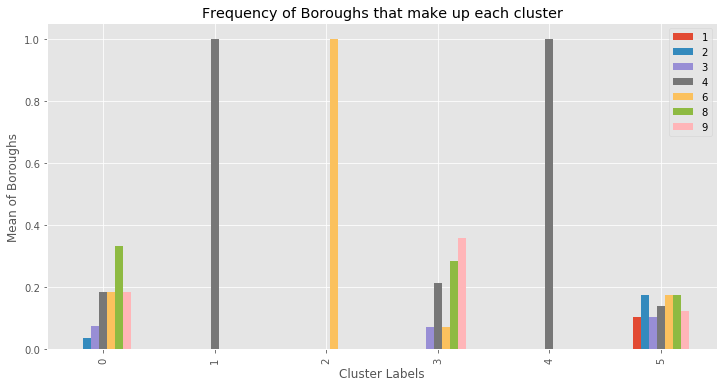

Text(0.5, 0, 'Cluster')

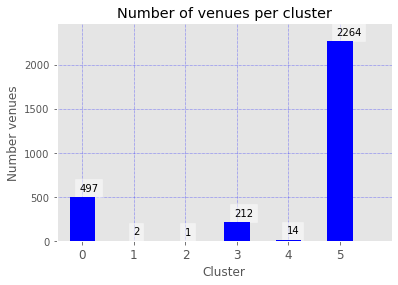

In [143]:
cluster_data_mean.plot(kind='bar', figsize=(12,6))
plt.title('Frequency of Boroughs that make up each cluster')
#plt.legend("Boroughs")
plt.ylabel("Mean of Boroughs")
plt.show()

ax = plt.subplot(111)
ax.set_xlim(-0.5, 6)
ax.grid(b=True, which='major', color='blue', linestyle=':', lw=.5, zorder=1)
# x,y data
x =np.array(cluster_groups["Cluster Labels"])
y = np.array(cluster_groups["Venue Category"])
# Define upper y limit leaving space for the text above the bars.
up = max(y) * .03
ax.set_ylim(0, max(y) + 3 * up)
ax.bar(x, y, align='center', width=0.5, color='blue', zorder=4)
# Add text to bars
for xi, yi, l in zip(*[x, y, list(map(str, y))]):
    ax.text(xi - len(l) * .02, yi + up, l,
            bbox=dict(facecolor='w', edgecolor='w', alpha=.5))
ax.set_xticks(x)
ax.set_xticklabels(['0','1','2','3','4','5'])
ax.tick_params(axis='x', which='major', labelsize=12)
ax.set_title('Number of venues per cluster')
ax.set_ylabel('Number venues')
ax.set_xlabel('Cluster')

In [144]:
cluster_data_mean.reset_index(inplace=True)

li = cluster_data_mean[(cluster_data_mean["Cluster Labels"]== 1)].index
li2 = cluster_data_mean[(cluster_data_mean["Cluster Labels"]== 2)].index
li4 = cluster_data_mean[(cluster_data_mean["Cluster Labels"]== 4)].index
cluster_data_mean.drop(li, inplace=True)
cluster_data_mean.drop(li2, inplace=True)
cluster_data_mean.drop(li4, inplace=True)

cluster_data_mean.sort_values(by="Cluster Labels", inplace=True)

cluster_data_mean.set_index("Cluster Labels", inplace=True)
cluster_data_mean

1         2         3         4         6         8  \
Cluster Labels                                                               
0               0.000000  0.037037  0.074074  0.185185  0.185185  0.333333   
3               0.000000  0.000000  0.071429  0.214286  0.071429  0.285714   
5               0.105263  0.175439  0.105263  0.140351  0.175439  0.175439   

                       9  
Cluster Labels            
0               0.185185  
3               0.357143  
5               0.122807

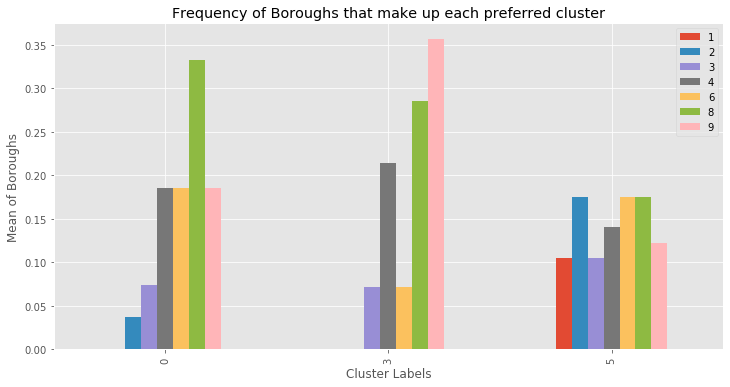

In [145]:
cluster_data_mean.plot(kind='bar', figsize=(12,6))
plt.title('Frequency of Boroughs that make up each preferred cluster')
#plt.legend("Boroughs")
plt.ylabel("Mean of Boroughs")
plt.show()



In [146]:
group_venue.reset_index(inplace=True)

li = group_venue[(group_venue["Cluster Labels"]== 1)].index
li2 = group_venue[(group_venue["Cluster Labels"]== 2)].index
li4 = group_venue[(group_venue["Cluster Labels"]== 4)].index
group_venue.drop(li, inplace=True)
group_venue.drop(li2, inplace=True)
group_venue.drop(li4, inplace=True)

group_venue.sort_values(by="Cluster Labels", inplace=True)

group_venue.set_index("Cluster Labels", inplace=True)
group_venue.rename(columns={"Districts": "Total Popular Venues per Borough on each cluster"}, inplace=True)
group_venue

Borough  Total Popular Venues per Borough on each cluster
Cluster Labels                                                          
0                    8                                               136
0                    3                                                43
0                    4                                                56
0                    6                                               104
0                    9                                               148
0                    2                                                10
3                    6                                                12
3                    9                                                97
3                    4                                                41
3                    8                                                32
3                    3                                                30
5                    3                                               257
5                    2                                               291
5                    9                                               324
5                    8                                               325
5                    6                                               368
5                    4                                               265
5                    1                                               434

In [147]:
group_venue.reset_index(inplace=True)
group_venue

Cluster Labels Borough  Total Popular Venues per Borough on each cluster
0                0       8                                               136
1                0       3                                                43
2                0       4                                                56
3                0       6                                               104
4                0       9                                               148
5                0       2                                                10
6                3       6                                                12
7                3       9                                                97
8                3       4                                                41
9                3       8                                                32
10               3       3                                                30
11               5       3                                               257
12               5       2                                               291
13               5       9                                               324
14               5       8                                               325
15               5       6                                               368
16               5       4                                               265
17               5       1                                               434

In [148]:
ind=5
#le = group_venue[group_venue["Cluster Labels"]== ind].index
le= group_venue.index[0]
le=group_venue.loc[13]
le[2]

324

Removing clusters that are not important to us anymore and renaming of the preferred clusters:

In [151]:
li = milan_merged[(milan_merged["Cluster Labels"]== 1)].index
li2 = milan_merged[(milan_merged["Cluster Labels"]== 2)].index
li4 = milan_merged[(milan_merged["Cluster Labels"]== 4)].index
milan_merged.drop(li, inplace=True)
milan_merged.drop(li2, inplace=True)
milan_merged.drop(li4, inplace=True)

group_venue.set_index("Cluster Labels", inplace=True)
milan_merged.head()

Borough               Name           Districts   Latitude  Longitude  \
0       1  (Centro storico,)               Brera  45.471519   9.187735   
1       1  (Centro storico,)      Centro Storico  45.444613   9.096351   
2       1  (Centro storico,)  Conca del Naviglio  45.458560   9.177745   
3       1  (Centro storico,)           Guastalla  45.458252   9.200023   
4       1  (Centro storico,)      Porta Sempione  45.477128   9.170598   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               5    Italian Restaurant                 Hotel   
1               5    Italian Restaurant                  Café   
2               5    Italian Restaurant                  Café   
3               5    Italian Restaurant           Pizza Place   
4               5    Italian Restaurant           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0        Ice Cream Shop   Japanese Restaurant                  Café   
1           Pizza Place      Sushi Restaurant             Gift Shop   
2        Ice Cream Shop                   Pub           Pizza Place   
3        Ice Cream Shop          Tram Station            Restaurant   
4          Cocktail Bar   Japanese Restaurant        Ice Cream Shop   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0            Restaurant                     Plaza            Art Museum   
1          Cupcake Shop                      Park         Movie Theater   
2                Bistro        Seafood Restaurant            Restaurant   
3                   Bar                    Bakery      Kebab Restaurant   
4                Bakery  Mediterranean Restaurant      Sushi Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place                Theater  
1           Flea Market   Fast Food Restaurant  
2          Cocktail Bar               Boutique  
3   Japanese Restaurant               Wine Bar  
4                  Café              Gastropub

In [239]:
cluster_dis = cluster_venues.groupby(["Districts", "Cluster Labels"]).count().sort_values(by='Venue Category', ascending=False)
cluster_dis.head(10)
#OR

cluster_dis = cluster_venues.groupby(["Districts", "Cluster Labels"]).count().sort_values(by="Cluster Labels", ascending=False)

cluster_dis.drop("Borough", inplace=True, axis=1)
cluster_dis.reset_index(inplace=True)
cluster_dis = cluster_dis.merge(df_milan, on="Districts")
cluster_dis.drop(["Name", "Latitude", "Longitude"], inplace=True, axis=1)

#cluster_dis = cluster_dis.merge(group_venue, on="Borough")
df_prefer= cluster_dis.sort_values(by="Venue Category", ascending=False).reset_index(drop=True)
df_prefer

Districts  Cluster Labels  Venue Category Borough
0                  Porta Tenaglia               5             100       1
1              Conca del Naviglio               5             100       1
2                 Porta Garibaldi               5              97       9
3                         Bullona               5              92       8
4                           Brera               5              90       1
5                   Porta Venezia               5              87       3
6                    Porta Romana               5              84       4
7                           Isola               5              80       9
8                       Conchetta               5              78       6
9                  Porta Sempione               5              78       1
10               Chinatown, Milan               5              73       8
11                Piazzale Loreto               5              70       2
12                     Ca' Granda               0              69       9
13                 Porta Vittoria               5              60       4
14   Centro Direzionale di Milano               5              60       9
15                 Porta Monforte               5              59       3
16                 Porta Ticinese               0              59       6
17                      Guastalla               5              55       1
18                       Foppette               5              51       6
19                Villa Magentino               5              50       6
20                   Porta Genova               5              49       6
21    San Cristoforo sul Naviglio               5              46       6
22                        Cagnola               5              45       8
23               Lodovico il Moro               5              44       6
24                      Casoretto               5              44       3
25                     Maggiolina               5              43       2
26                    Porta Volta               5              41       8
27                  Sant'Ambrogio               5              40       6
28                     La Fontana               0              40       9
29                       Portello               0              38       8
30                      San Luigi               5              37       4
31                   Ponte Seveso               5              36       2
32                        Bicocca               5              35       9
33                       Lambrate               5              35       3
34                     Acquabella               5              34       4
35                    Città Studi               0              33       3
36                     Gamboloita               3              32       4
37                     Montalbino               3              31       9
38                        Rottole               3              30       3
39                       Precotto               5              30       2
40                         Bovisa               5              29       9
41                          Gorla               5              26       2
42                      Mirabello               5              25       2
43                     Calvairate               5              25       4
44                Prato Centenaro               3              23       9
45                          Turro               5              22       2
46                      Garegnano               0              22       8
47                     Boldinasco               5              22       8
48                       Varesina               5              20       8
49                         Ortica               5              19       3
50                        Dergano               3              17       9
51            Milano Santa Giulia               0              17       4
52      Villaggio dei Giornalisti               5              17       2
53                          

In [179]:
cluster_names = pd.DataFrame({"Cluster Labels":[0, 3, 5],
                              "Cluster Names": ["2nd Preferred Cluster", "3rd Preferred Cluster", "1st Preferred Cluster"]})

milan_merged = milan_merged.merge(cluster_names, on= "Cluster Labels")
milan_merged.dropna(inplace=True)
milan_merged.head()

p_clus = pd.DataFrame(milan_merged[["Borough", "Name", "Districts", "Cluster Labels", "Cluster Names", "Latitude", "Longitude"]])
p_clus.head(10)


Borough                                               Name  \
0       1                                  (Centro storico,)   
1       1                                  (Centro storico,)   
2       1                                  (Centro storico,)   
3       1                                  (Centro storico,)   
4       1                                  (Centro storico,)   
5       1                                  (Centro storico,)   
6       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
7       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
8       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   
9       2  (Stazione di Milano Centrale, Gorla, Turro, Gr...   

            Districts  Cluster Labels          Cluster Names   Latitude  \
0               Brera               5  1st Preferred Cluster  45.471519   
1      Centro Storico               5  1st Preferred Cluster  45.444613   
2  Conca del Naviglio               5  1st Preferred Cluster  45.458560   
3           Guastalla               5  1st Preferred Cluster  45.458252   
4      Porta Sempione               5  1st Preferred Cluster  45.477128   
5      Porta Tenaglia               5  1st Preferred Cluster  45.477821   
6             Adriano               5  1st Preferred Cluster  45.513572   
7         Crescenzago               5  1st Preferred Cluster  45.509219   
8               Gorla               5  1st Preferred Cluster  45.504945   
9     Piazzale Loreto               5  1st Preferred Cluster  45.485859   

   Longitude  
0   9.187735  
1   9.096351  
2   9.177745  
3   9.200023  
4   9.170598  
5   9.181593  
6   9.251202  
7   9.247484  
8   9.224539  
9   9.216384

In [227]:
map_preferred_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

lab = milan_merged["Cluster Labels"].sort_values().unique()


# add markers to the map
markers_colors = []
for borough, lat, lon, dis, cluster, name in zip(milan_merged['Borough'], milan_merged['Latitude'], milan_merged['Longitude'], milan_merged['Districts'], milan_merged['Cluster Labels'], milan_merged['Cluster Names']):
    label = folium.Popup('Municipio/ Borough ' +  str(borough) + ', ' + str(dis) + ', \n' + str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_preferred_clusters)
map_preferred_clusters
HTML(map_preferred_clusters._repr_html_())

In [240]:
df_prefer = df_prefer.merge(cluster_names, on= "Cluster Labels")
#df_prefer.dropna(inplace=True)
df_prefer.reset_index(drop=True)
df_prefer
#df_prefer.sort_values(by="Borough")


Districts  Cluster Labels  Venue Category Borough  \
0                 Porta Tenaglia               5             100       1   
1             Conca del Naviglio               5             100       1   
2                Porta Garibaldi               5              97       9   
3                        Bullona               5              92       8   
4                          Brera               5              90       1   
5                  Porta Venezia               5              87       3   
6                   Porta Romana               5              84       4   
7                          Isola               5              80       9   
8                      Conchetta               5              78       6   
9                 Porta Sempione               5              78       1   
10              Chinatown, Milan               5              73       8   
11               Piazzale Loreto               5              70       2   
12                Porta Vittoria               5              60       4   
13  Centro Direzionale di Milano               5              60       9   
14                Porta Monforte               5              59       3   
15                     Guastalla               5              55       1   
16                      Foppette               5              51       6   
17               Villa Magentino               5              50       6   
18                  Porta Genova               5              49       6   
19   San Cristoforo sul Naviglio               5              46       6   
20                       Cagnola               5              45       8   
21              Lodovico il Moro               5              44       6   
22                     Casoretto               5              44       3   
23                    Maggiolina               5              43       2   
24                   Porta Volta               5              41       8   
25                 Sant'Ambrogio               5              40       6   
26                     San Luigi               5              37       4   
27                  Ponte Seveso               5              36       2   
28                       Bicocca               5              35       9   
29                      Lambrate               5              35       3   
30                    Acquabella               5              34       4   
31                      Precotto               5              30       2   
32                        Bovisa               5              29       9   
33                         Gorla               5              26       2   
34                     Mirabello               5              25       2   
35                    Calvairate               5              25       4   
36                         Turro               5              22       2   
37                    Boldinasco               5              22       8   
38                      Varesina               5              20       8   
39                        Ortica               5              19       3   
40     Villaggio dei Giornalisti               5              17       2   
41                   Crescenzago               5              16       2   
42                      Cavriano               5              16       4   
43                        Affori               5              15       9   
44                       Cimiano               5              13       3   
45                       Roserio               5              11       8   
46                Centro Storico               5              11       1   
47                    Lampugnano               5               9       8   
48                      Bruzzano               5               8       9   
49                           QT8               5               7       8   
50                       Adriano               5               6       2   
51               Cascina Triulza               5               5       